In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
import pytest

from PySDE.simulate import (
    generate_time_grid,
    simulate_gbm,
    simulate_ou,
    simulate_cir,
    simulate_heston
)
from PySDE.custom import simulate_custom

from PySDE.estimate import (
    estimate_gbm_mle,
    estimate_ou_mle,
    estimate_gbm_map,
    fit_sde,
    EstimationError
)

from PySDE import fit as fit_module

# plotting
from PySDE import plot
from PySDE import dataset
from PySDE.dataset import SDEDataset


In [8]:
df = pd.read_csv('test_data/A.csv', index_col=0, parse_dates=True)
df = df[::-1]  # reverse the order to have chronological order
df.head()

,volume,open,high,low,close,adj close
date,,,,,,
1999-11-18,62546300,32.546494,35.765381,28.612303,31.473534,27.068665
1999-11-19,15234100,30.713520,30.758226,28.478184,28.880543,24.838577
1999-11-22,6577800,29.551144,31.473534,28.657009,31.473534,27.068665
1999-11-23,5975600,30.400572,31.205294,28.612303,28.612303,24.607880
1999-11-24,4843200,28.701717,29.998211,28.612303,29.372318,25.261524


In [9]:
prices = df['close'].values

In [10]:
dt = 1.0
params = estimate_gbm_mle(prices, dt)
print("Estimated parameters for GBM (MLE):", params)

Estimated parameters for GBM (MLE): {'mu': np.float64(0.0005866533041997374), 'sigma': np.float64(0.02610904291869641)}


In [11]:
from PySDE.fit import fit_models, select_model

results = fit_models(prices, dt)
print("Model fit results:", results)

best_model, metrics = select_model(prices, dt)
print(f"Best model: {best_model}")
print("Metrics:", metrics)

Model fit results: {'gbm': {'params': {'mu': np.float64(0.0005866533041997374), 'sigma': np.float64(0.02610904291869641)}, 'nll': np.float64(-13504.434893119927), 'aic': np.float64(-27004.869786239855), 'bic': np.float64(-26991.448876863356)}, 'ou': {'params': {'theta': np.float64(1.000000500029089e-06), 'mu': np.float64(17904.55736463443), 'sigma': np.float64(1.3685525915167145)}, 'nll': np.float64(10508.775233372882), 'aic': np.float64(21023.550466745764), 'bic': np.float64(21043.68183081051)}, 'vasicek': {'params': {'theta': np.float64(1.000000500029089e-06), 'mu': np.float64(17904.55736463443), 'sigma': np.float64(1.3685525915167145)}, 'nll': np.float64(10508.775233372882), 'aic': np.float64(21023.550466745764), 'bic': np.float64(21043.68183081051)}}
Best model: gbm
Metrics: {'params': {'mu': np.float64(0.0005866533041997374), 'sigma': np.float64(0.02610904291869641)}, 'nll': np.float64(-13504.434893119927), 'aic': np.float64(-27004.869786239855), 'bic': np.float64(-26991.448876863

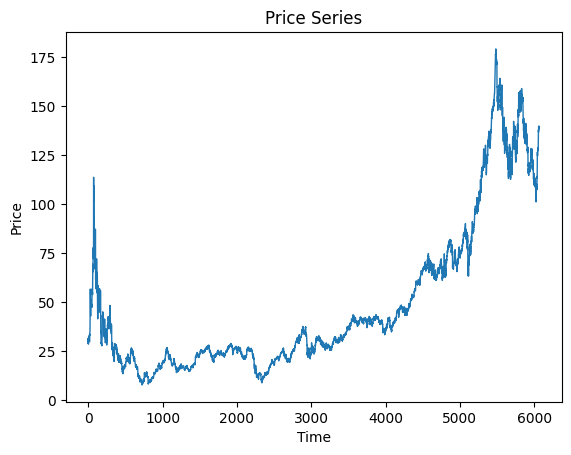

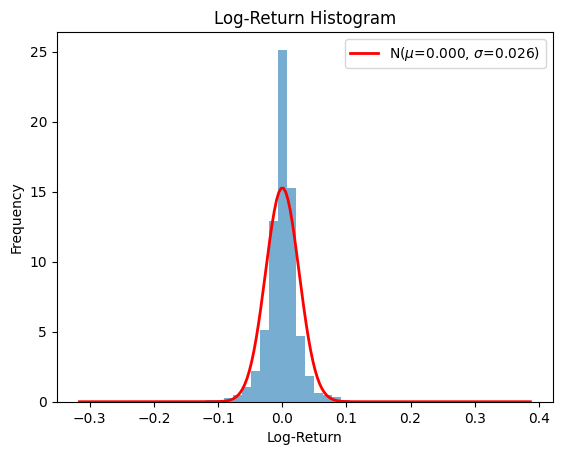

In [13]:
ax1 = plot.plot_price_series(prices)
ax2 = plot.plot_log_return_hist(prices)
plt.show()